In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Online retail.xlsx to Online retail (1).xlsx


In [ ]:
file_name = list(uploaded.keys())[0]
data = pd.read_excel(file_name)

## **Data Preprocessing:**
Pre-process the dataset to ensure it is suitable for Association rules, this may include handling missing values, removing duplicates, and converting the data to appropriate format.

In [ ]:

data_cleaned = data.dropna()

data_cleaned = data_cleaned.drop_duplicates()

In [ ]:
# Split the transaction data into individual items
data_cleaned['transactions'] = data_cleaned.iloc[:, 0].apply(lambda x: x.split(','))


The dataset is cleaned by removing missing values and duplicates, and the transaction data is split into individual items.

In [ ]:
# Create a list of all unique items
# convert set to list
all_items = list(set([item for sublist in data_cleaned['transactions'] for item in sublist]))


In [ ]:
# Create a one-hot encoded DataFrame
one_hot_encoded_data = pd.DataFrame([[1 if item in transaction else 0 for item in all_items] for transaction in data_cleaned['transactions']], columns=all_items)


Because to apply association rules data should be 'True','False',1 or 0

## **Association Rule Mining:**

•	Implement an Apriori algorithm using tool like python with libraries such as Pandas and Mlxtend etc.

•	 Apply association rule mining techniques to the pre-processed dataset to discover interesting relationships between products purchased together.

•	Set appropriate threshold for support, confidence and lift to extract meaning full rules.


**Association rule mining techniques** are methods used to discover interesting relationships and patterns in datasets.

The **Apriori algorithm** is a classic and widely-used method for mining frequent itemsets and association rules in a dataset. It is particularly effective for market basket analysis and other applications where you need to discover relationships between items.



In [ ]:
# Apply Apriori Algorithm
# Use the Apriori algorithm to find frequent itemsets with a minimum support of 0.01
frequent_itemsets = apriori(one_hot_encoded_data, min_support=0.01, use_colnames=True)


In [ ]:
# Generate the association rules with minimum confidence of 0.2
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

# Sort rules by lift
rules = rules.sort_values(by='lift', ascending=False)

In association rule mining, sorting rules by **lift** refers to organizing the discovered association rules based on the **lift metric**. **Lift** is a key measure used to evaluate the strength and interestingness of an association rule.

**Analysis and Interpretation:**

•	Analyse the generated rules to identify interesting patterns and relationships between the products.

•	Interpret the results and provide insights into customer purchasing behaviour based on the discovered rules.


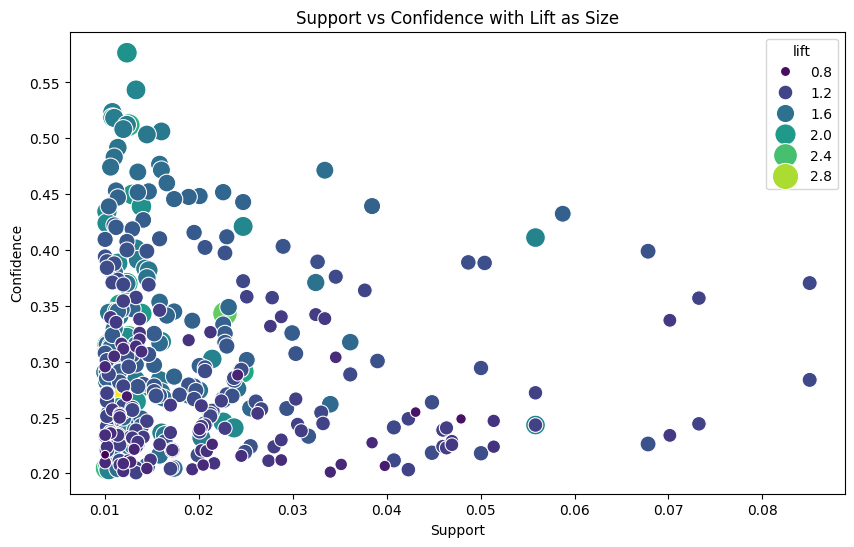

In [ ]:
# Visualizing support vs confidence using scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', data=rules, palette='viridis', legend=True, sizes=(40, 400))
plt.title('Support vs Confidence with Lift as Size')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

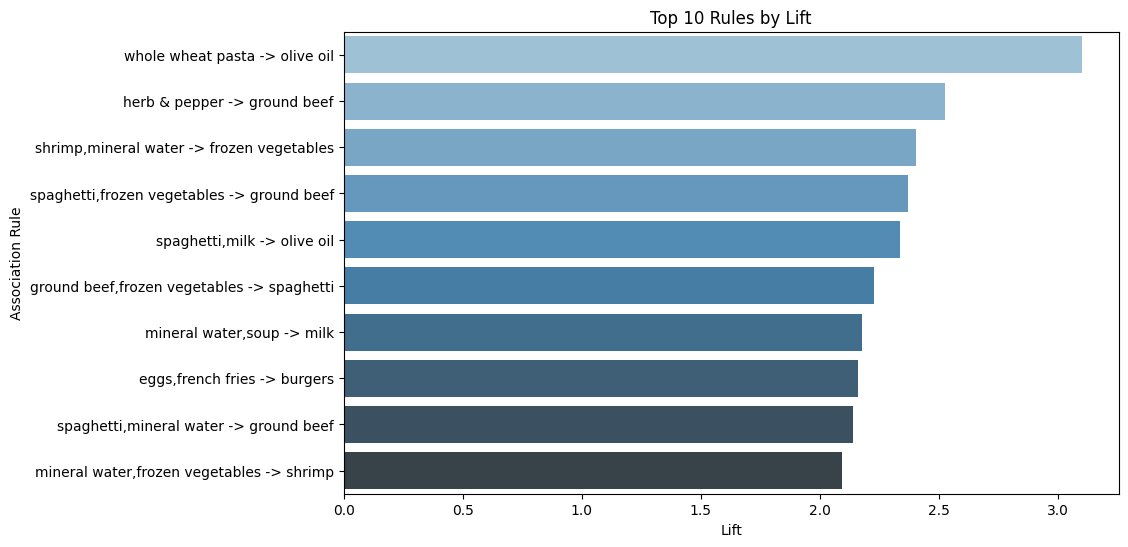

In [ ]:
# Top 10 rules based on Lift
# use bar chart to visualize this
plt.figure(figsize=(10,6))
rules['rule'] = rules['antecedents'].apply(lambda x: ','.join(list(x))) + ' -> ' + rules['consequents'].apply(lambda x: ','.join(list(x)))
top_10_rules = rules.nlargest(10, 'lift')

sns.barplot(x='lift', y='rule', data=top_10_rules, palette='Blues_d')
plt.title('Top 10 Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Association Rule')
plt.show()

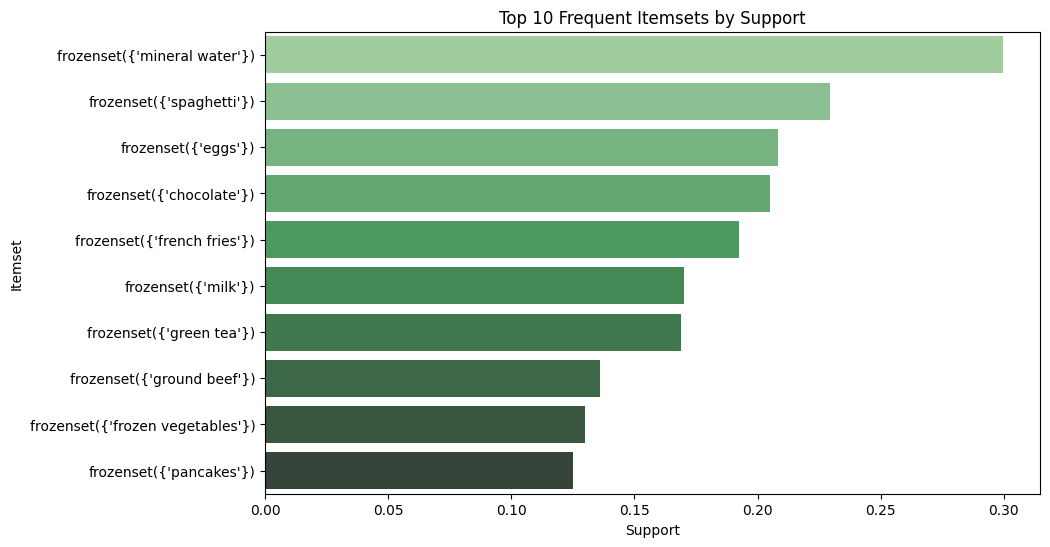

In [ ]:
# Top 10 Frequent itemsets by support
# use barchart
plt.figure(figsize=(10,6))
top_10_itemsets = frequent_itemsets.nlargest(10, 'support')

sns.barplot(x='support', y='itemsets', data=top_10_itemsets, palette='Greens_d')
plt.title('Top 10 Frequent Itemsets by Support')
plt.xlabel('Support')
plt.ylabel('Itemset')
plt.show()

**Support vs Confidence Plot:**

Scatter plot with lift as the size.

**Top 10 Rules by Lift:**

 Bar chart of the top 10 association rules.

**Top 10 Frequent Itemsets by Support:**

Bar chart showing frequent itemsets.

In [ ]:
# Interpret Results

print("Top 5 Association Rules:\n\n", rules.head(5))

Top 5 Association Rules:

                         antecedents          consequents  antecedent support  \
52              (whole wheat pasta)          (olive oil)            0.040580   
76                  (herb & pepper)        (ground beef)            0.066473   
208         (shrimp, mineral water)  (frozen vegetables)            0.033430   
204  (spaghetti, frozen vegetables)        (ground beef)            0.039034   
223               (spaghetti, milk)          (olive oil)            0.050048   

     consequent support   support  confidence      lift  leverage  conviction  \
52             0.087536  0.011014    0.271429  3.100757  0.007462    1.252401   
76             0.135845  0.022802    0.343023  2.525100  0.013772    1.315350   
208            0.129855  0.010435    0.312139  2.403747  0.006094    1.265001   
204            0.135845  0.012560    0.321782  2.368738  0.007258    1.274155   
223            0.087536  0.010242    0.204633  2.337697  0.005861    1.147224   

     

In [ ]:
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,rule
52,(whole wheat pasta),(olive oil),0.040580,0.087536,0.011014,0.271429,3.100757,0.007462,1.252401,0.706154,whole wheat pasta -> olive oil
76,(herb & pepper),(ground beef),0.066473,0.135845,0.022802,0.343023,2.525100,0.013772,1.315350,0.646983,herb & pepper -> ground beef
208,"(shrimp, mineral water)",(frozen vegetables),0.033430,0.129855,0.010435,0.312139,2.403747,0.006094,1.265001,0.604181,"shrimp,mineral water -> frozen vegetables"
204,"(spaghetti, frozen vegetables)",(ground beef),0.039034,0.135845,0.012560,0.321782,2.368738,0.007258,1.274155,0.601306,"spaghetti,frozen vegetables -> ground beef"
223,"(spaghetti, milk)",(olive oil),0.050048,0.087536,0.010242,0.204633,2.337697,0.005861,1.147224,0.602377,"spaghetti,milk -> olive oil"


This outputs the top 5 association rules based on lift.

## **Conclusion**

- frequent itemsets—groups of items that appear together in transactions with a frequency (support) higher than a specified threshold.

- A frequent itemset with high support means that the products in this set are often bought together.

- Support measures how often an itemset occurs in the dataset.

-  scatter plot shows the relationships between support and confidence for the association rules, with the size of each point representing the lift.Larger points (higher lift) are the most interesting, showing stronger associations.

- High-lift rules suggest pairs of products that customers often buy together.

- Rules with high confidence reveal customer preferences

**By applying association rule mining to this dataset, we gain valuable insights into customer purchasing patterns. The high-lift rules indicate strong associations between products that can be leveraged to drive cross-selling and upselling strategies, while frequent itemsets help identify popular combinations of products.**



### **1.	What is lift and why is it important in Association rules?**

Lift is a metric that measures the strength of a rule by comparing the observed frequency of a rule with the frequency expected if the items were independent. Essentially, it evaluates how much more likely two items are to be found together than we would expect by chance.

Lift is calculated as the ratio of the observed support of the rule (i.e., how frequently the items appear together) to the expected support if the items were independent.

Lift helps in understanding the strength of a rule beyond mere coincidence.

Lift helps in identifying rules that provide more valuable insights into relationships within the data, as it adjusts for the baseline frequencies of items.

### **2.	What is support and Confidence. How do you calculate them?**

**Support** measures how frequently a particular item or itemset appears in the dataset. It helps identify the overall importance or frequency of the item or itemset.

The support of an itemset
X is defined as the proportion of transactions in the dataset that contain
X.

**Confidence** measures the likelihood that an item
B is present in a transaction given that
A is present. It evaluates the strength of the implication or rule.

 The confidence of a rule
A→B is the probability that
B occurs given that
A occurs.

> Support helps identify frequent itemsets, while confidence helps gauge the reliability of the rules.

### **3.	What are some limitations or challenges of Association rules mining?**

**1. Scalability**

> Challenge: Association rule mining can be computationally expensive, especially with large datasets. The number of potential itemsets grows exponentially with the number of items, leading to significant computational and memory requirements.


> Solution: Techniques such as the Apriori algorithm use a breadth-first search strategy to reduce the number of candidate itemsets, and algorithms like FP-Growth use a more efficient data structure to address scalability issues.


**2. Handling Large Itemsets**


> Challenge: As the number of items in transactions increases, the number of possible itemsets grows rapidly, leading to a combinatorial explosion of candidate rules.


> Solution: Pruning strategies and constraints (like minimum support and confidence thresholds) are used to filter out less relevant itemsets and rules.

**3. High Dimensionality**

> Challenge: In datasets with many attributes or items, association rules may become too numerous to analyze effectively, making it hard to interpret or make decisions based on the results.

> Solution: Dimensionality reduction techniques or feature selection methods can be applied before mining to manage high dimensionality.

**4. Rule Redundancy**

> Challenge: Many association rules might be redundant or similar, leading to a large number of overlapping rules.

> Solution: Post-processing techniques, such as rule clustering or pruning based on metrics like lift, can help in reducing redundancy.

**5. Interpretability**

> Challenge: The rules generated can sometimes be complex or difficult to interpret, especially when dealing with large itemsets or when rules have low support or confidence.

> Solution: Focus on simpler, more actionable rules and use visualization tools to help interpret the results.

**6. Sparsity of Data**

> Challenge: In some datasets, especially those with a high level of sparsity (many zeros or missing values), finding meaningful associations can be difficult.

> Solution: Techniques like data imputation or using alternative metrics that handle sparsity better can help address this issue.

**7. Dynamic Data**

> Challenge: Association rules mining typically assumes static data, but in real-world scenarios, data may change over time. This can make previously discovered rules obsolete or less relevant.

> Solution: Periodically update the rules and adapt the mining process to handle evolving data.

**8. Noise and Outliers**
> Challenge: Noise and outliers in the data can lead to the discovery of spurious rules that do not generalize well.

> Solution: Preprocess the data to clean and filter out noise and outliers before applying association rule mining.